In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/DL/sign_mnist_train.csv")
test_data = pd.read_csv('/content/drive/MyDrive/DL/sign_mnist_test.csv')

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

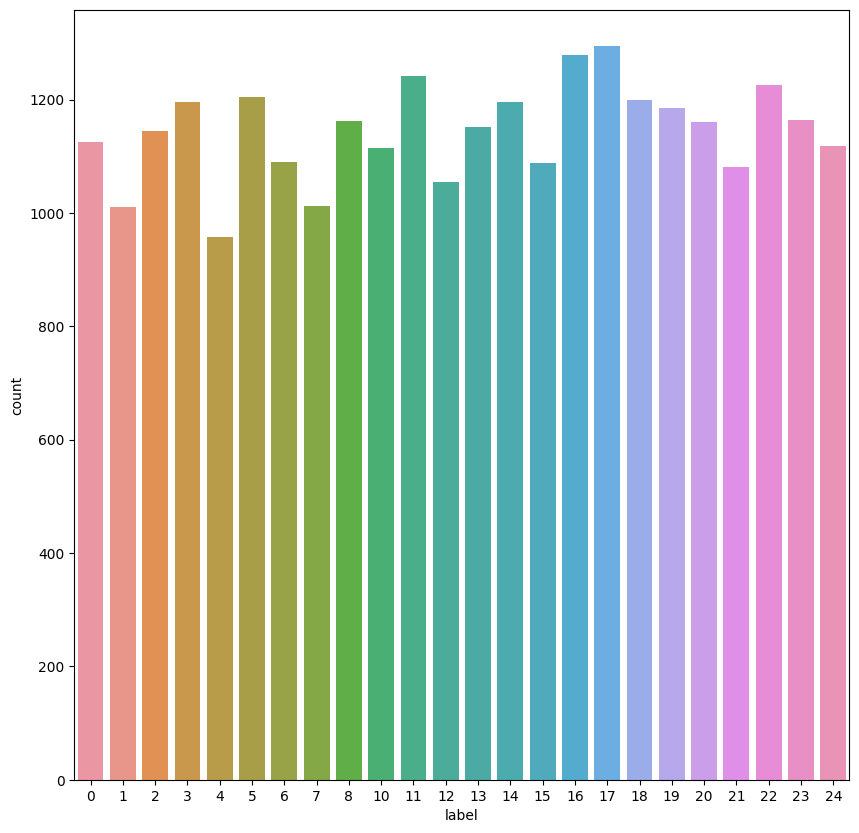

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_data, x='label')

y_train = train_data['label']
X_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
y_test = test_data['label']
X_test = test_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

labels = y_train.unique().tolist()
labels.sort()
labels

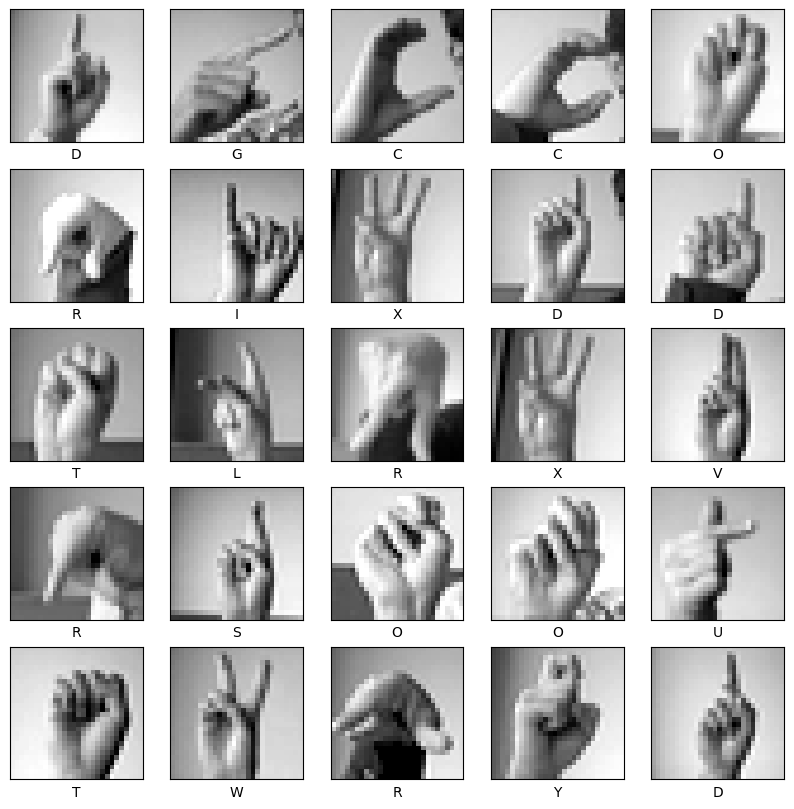

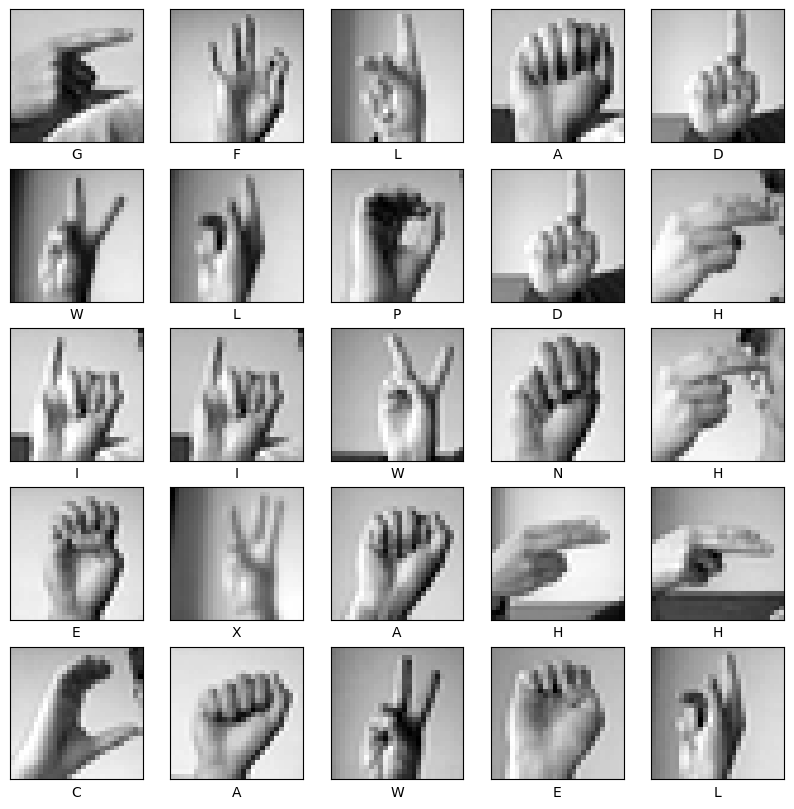

In [ ]:
classes = []
for label in labels:
    classes.append(chr(label + 65))
classes

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(classes[y_train[i]])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel(classes[y_test[i]])
plt.show()

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(y_train)
y_train_binarized = lb.transform(y_train)
y_test_binarized = lb.transform(y_test)

y_train_binarized

y_train_binarized.shape

(27455, 24)

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(654, activation='relu'),
    tf.keras.layers.Dense(456, activation='relu'),
    tf.keras.layers.Dense(347, activation='relu'),
    tf.keras.layers.Dense(478, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 654)               513390    
                                                                 
 dense_10 (Dense)            (None, 456)               298680    
                                                                 
 dense_11 (Dense)            (None, 347)               158579    
                                                                 
 dense_12 (Dense)            (None, 478)               166344    
                                                                 
 dense_13 (Dense)            (None, 24)                11496     
                                                                 
Total params: 1,148,489
Trainable params: 1,148,489
No

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train_binarized, validation_split=0.2, epochs=15, batch_size=128)

Epoch 1/15
172/172 [==============================] - 9s 41ms/step - loss: 2.0992 - accuracy: 0.3316 - val_loss: 1.3786 - val_accuracy: 0.5158
Epoch 2/15
172/172 [==============================] - 7s 39ms/step - loss: 0.9905 - accuracy: 0.6615 - val_loss: 0.6798 - val_accuracy: 0.7545
Epoch 3/15
172/172 [==============================] - 7s 41ms/step - loss: 0.5084 - accuracy: 0.8235 - val_loss: 0.2943 - val_accuracy: 0.9015
Epoch 4/15
172/172 [==============================] - 6s 33ms/step - loss: 0.2781 - accuracy: 0.9049 - val_loss: 0.2015 - val_accuracy: 0.9328
Epoch 5/15
172/172 [==============================] - 7s 43ms/step - loss: 0.1836 - accuracy: 0.9376 - val_loss: 0.0723 - val_accuracy: 0.9863
Epoch 6/15
172/172 [==============================] - 6s 35ms/step - loss: 0.0922 - accuracy: 0.9721 - val_loss: 0.0580 - val_accuracy: 0.9820
Epoch 7/15
172/172 [==============================] - 12s 69ms/step - loss: 0.1652 - accuracy: 0.9470 - val_loss: 0.0405 - val_accuracy: 0.991

In [ ]:
model.evaluate(X_test, y_test_binarized)


225/225 [==============================] - 3s 11ms/step - loss: 1.0753 - accuracy: 0.8199


[1.0752676725387573, 0.8198549747467041]

225/225 - 1s - loss: 1.0753 - accuracy: 0.8199 - 939ms/epoch - 4ms/step
Test accuracy is 81.99%
1/1 [==============================] - 0s 79ms/step


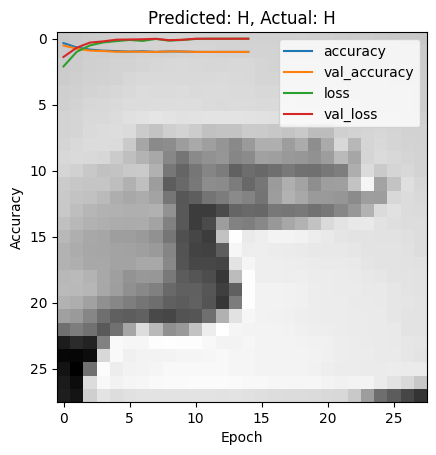

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test, y_test_binarized, verbose=2)

print(f'Test accuracy is {test_acc * 100:.2f}%')

rand_idx = np.random.randint(0, len(X_test))

image = X_test[rand_idx]
label = y_test[rand_idx]

prediction = model.predict(np.expand_dims(image, axis=0))

predicted_class = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {classes[predicted_class]}, Actual: {classes[label] if label < 9 else classes[label - 1]}')
plt.show()